
# üî• **Proyecto de Ciencia de Datos: Incendios Forestales**
**Materia:** Programaci√≥n 2 - Unidad 3 Tema 2  
**Equipo:**  
- Gabriela Ocampo (Coordinadora)
- Alisson Atupa√±a
- Anderson Cauja
- Katherine Salda√±a

**Fecha:** 06/07/2025



## 1Ô∏è‚É£ Selecci√≥n y Justificaci√≥n del Dataset

Seleccionamos el dataset **Forest Fires** porque contiene registros detallados de factores meteorol√≥gicos.

**Justificaci√≥n de la selecci√≥n del dataset**

El dataset Forest Fires fue seleccionado debido a que contiene informaci√≥n exhaustiva sobre variables meteorol√≥gicas, estacionales y ambientales que inciden en la ocurrencia y severidad de incendios forestales en el Parque Nacional Montesinho, Portugal. Este conjunto de datos resulta particularmente relevante, ya que posibilita el an√°lisis de un problema ambiental de alto impacto econ√≥mico, ecol√≥gico y social. La comprensi√≥n de los factores que determinan la magnitud de los incendios forestales es fundamental para dise√±ar estrategias de prevenci√≥n, asignar recursos de manera m√°s eficiente y reducir da√±os a los ecosistemas. Asimismo, el dataset permite aplicar t√©cnicas de aprendizaje autom√°tico y an√°lisis exploratorio en un contexto real y complejo, contribuyendo a fortalecer las competencias anal√≠ticas de los estudiantes.

**¬øPor qu√© es relevante la dataset?**

- La relevancia de este dataset radica en los siguientes aspectos:

- Contiene variables multivariantes que describen condiciones clim√°ticas y caracter√≠sticas temporales asociadas a los incendios.

- Ofrece un escenario adecuado para la implementaci√≥n de modelos de clasificaci√≥n y t√©cnicas de visualizaci√≥n de datos.

- Facilita la identificaci√≥n de patrones que pueden ser √∫tiles en la toma de decisiones en el √°mbito de la gesti√≥n ambiental.

- Brinda la posibilidad de formular hip√≥tesis verificables acerca de los factores que propician la propagaci√≥n de incendios de gran magnitud.

**Preguntas de investigaci√≥n:**

**Pregunta 1**
¬øQu√© variables meteorol√≥gicas presentan una mayor influencia en la probabilidad de que un incendio forestal supere las 5 hect√°reas de √°rea quemada?

**Pregunta 2**
¬øEs posible predecir si un incendio ser√° clasificado como peque√±o o grande a partir de las caracter√≠sticas meteorol√≥gicas y del entorno mediante modelos de aprendizaje supervisado?

- Hip√≥tesis:
El modelo de Random Forest alcanzar√° un mejor desempe√±o en t√©rminos de precisi√≥n y recall en comparaci√≥n con la regresi√≥n log√≠stica.

**- Hip√≥tesis 3**
Los incendios ocurridos durante los meses de verano (julio, agosto, septiembre) presentan una mayor √°rea quemada en promedio respecto a otros meses.

**Pregunta 4**
¬øQu√© combinaci√≥n de variables clim√°ticas y d√≠as de la semana se asocia con una mayor frecuencia de incendios?

**- Hip√≥tesis 5**
Valores elevados del √≠ndice FFMC aumentan la probabilidad de incendios con √°reas quemadas superiores a 5 hect√°reas.




In [18]:

# Gabriela Ocampo - Importaci√≥n de librer√≠as
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif


In [19]:

# Alisson Atupa√±a - Carga del dataset local
data = pd.read_csv('forestfires.csv')
data.head()


X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


## 2Ô∏è‚É£ Preprocesamiento y An√°lisis Exploratorio


**Limpieza de datos: detecci√≥n y tratamiento de valores nulos y outliers**

**Revisi√≥n de valores nulos:**
Se verific√≥ la existencia de valores faltantes mediante la funci√≥n .isnull().sum(). El an√°lisis indic√≥ que no se registran valores nulos en ninguna de las columnas del dataset. Por lo tanto, no fue necesario realizar imputaciones ni eliminaci√≥n de registros incompletos.

**Tratamiento de outliers:**
Durante la exploraci√≥n inicial, se identificaron valores extremos en la variable area, los cuales corresponden a incendios que afectaron superficies significativamente mayores al promedio. Tras evaluar su naturaleza, se determin√≥ que estos valores son observaciones v√°lidas y relevantes, dado que representan eventos excepcionales que pueden aportar informaci√≥n cr√≠tica al an√°lisis predictivo. Por esta raz√≥n, se decidi√≥ conservarlos en el conjunto de datos, documentando su presencia y consider√°ndolos en la interpretaci√≥n de los resultados.



In [20]:

# Katherine Salda√±a - Revisi√≥n de valores nulos
data.isnull().sum()


X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [21]:

# Anderson Cauja - Estad√≠sticas descriptivas
data.describe()


X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653    0.295959    63.655818  
min      2.200000   15.000000    0.400000    0.000000     0.000000  
25%     15.500000   33.000000    2.700000    0.000000     0.000000  
50%     19.300000   42.000000    4.000000    0.000000     0.520000  
75%     22.800000   53.000000    4.900000    0.000000     6.570000  
max     33.300000  100.000000    9.400000    6.400000  1090.840000

# Transformaci√≥n y codificaci√≥n de variables categ√≥ricas

Se identificaron dos variables categ√≥ricas de tipo texto: month y day. Para permitir su uso en modelos de aprendizaje supervisado, se aplicaron las siguientes transformaciones:

**Codificaci√≥n ordinal con LabelEncoder:**

La variable month fue transformada a valores num√©ricos mediante el uso de LabelEncoder(). Esta decisi√≥n se tom√≥ considerando que los meses tienen un orden natural cronol√≥gico.
La variable day tambi√©n fue codificada con LabelEncoder() porque representa una secuencia recurrente de d√≠as de la semana.

**Alternativa con pd.get_dummies():**

En un escenario diferente, podr√≠a optarse por pd.get_dummies() para crear variables dummy y evitar atribuir un orden arbitrario. Sin embargo, dado que los modelos seleccionados (Random Forest y Regresi√≥n Log√≠stica) son robustos frente a codificaciones num√©ricas y el tama√±o del dataset es moderado, se consider√≥ adecuado utilizar LabelEncoder() por su simplicidad.

**Justificaci√≥n:**
El proceso de codificaci√≥n se llev√≥ a cabo con el prop√≥sito de convertir variables categ√≥ricas en representaciones num√©ricas compatibles con algoritmos de clasificaci√≥n, asegurando que los modelos pudieran procesar la informaci√≥n sin generar errores.

In [22]:

# Katherine Salda√±a - Codificaci√≥n de variables categ√≥ricas
data['month'] = LabelEncoder().fit_transform(data['month'])
data['day'] = LabelEncoder().fit_transform(data['day'])


**Normalizaci√≥n de variables num√©ricas**

Se aplic√≥ la estandarizaci√≥n mediante la clase **StandardScaler()** de **Scikit-learn** a todas las variables num√©ricas (excepto area y target). Esta decisi√≥n tuvo como finalidad homogeneizar las escalas de las variables y evitar que aquellas con rangos num√©ricos elevados tuvieran un peso desproporcionado en el entrenamiento de los modelos.

**Justificaci√≥n:**
La estandarizaci√≥n es una pr√°ctica recomendada en problemas de aprendizaje supervisado porque facilita la convergencia de algoritmos como la regresi√≥n log√≠stica y mejora la estabilidad num√©rica durante el proceso de optimizaci√≥n.

In [23]:

# Alisson Atupa√±a - Normalizaci√≥n de variables num√©ricas
scaler = StandardScaler()
numericas = data.columns.drop('area')
data[numericas] = scaler.fit_transform(data[numericas])
data.head()


X         Y     month       day      FFMC       DMC        DC  \
0  1.008313  0.569860  0.284222 -1.423121 -0.805959 -1.323326 -1.830477   
1  1.008313 -0.244001  0.970871  1.176715 -0.008102 -1.179541  0.488891   
2  1.008313 -0.244001  0.970871 -0.383187 -0.008102 -1.049822  0.560715   
3  1.440925  1.383722  0.284222 -1.423121  0.191362 -1.212361 -1.898266   
4  1.440925  1.383722  0.284222  0.136781 -0.243833 -0.931043 -1.798600   

        ISI      temp        RH      wind      rain  area  
0 -0.860946 -1.842640  0.411724  1.498614 -0.073268   0.0  
1 -0.509688 -0.153278 -0.692456 -1.741756 -0.073268   0.0  
2 -0.509688 -0.739383 -0.692456 -1.518282 -0.073268   0.0  
3 -0.004756 -1.825402  3.233519 -0.009834  0.603155   0.0  
4  0.126966 -1.291012  3.356206 -1.238940 -0.073268   0.0

# Visualizaciones exploratorias y justificaci√≥n

**Se realizaron las siguientes visualizaciones:**

**Histograma de la variable area:**

Permiti√≥ observar la distribuci√≥n altamente asim√©trica, con una concentraci√≥n de incendios de peque√±a magnitud y pocos casos extremos. Esta visualizaci√≥n justific√≥ la creaci√≥n de una variable objetivo binaria (incendios peque√±os y grandes).

**Mapa de calor de correlaciones:**

Ayud√≥ a identificar relaciones entre variables meteorol√≥gicas, permitiendo explorar patrones que podr√≠an incidir en la predicci√≥n de la magnitud del incendio.

**Justificaci√≥n:**
Las visualizaciones exploratorias fueron fundamentales para comprender la estructura del dataset y tomar decisiones fundamentadas respecto al preprocesamiento, la selecci√≥n de variables y la creaci√≥n de la variable objetivo.

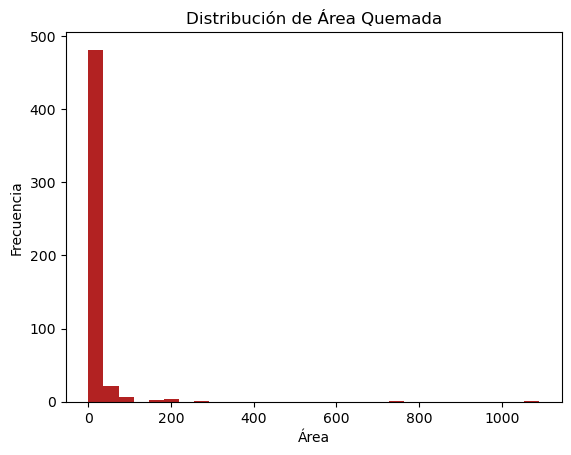

In [24]:

# Gabriela Ocampo - Visualizaci√≥n de √°rea quemada
plt.hist(data['area'], bins=30, color='firebrick')
plt.title('Distribuci√≥n de √Årea Quemada')
plt.xlabel('√Årea')
plt.ylabel('Frecuencia')
plt.show()


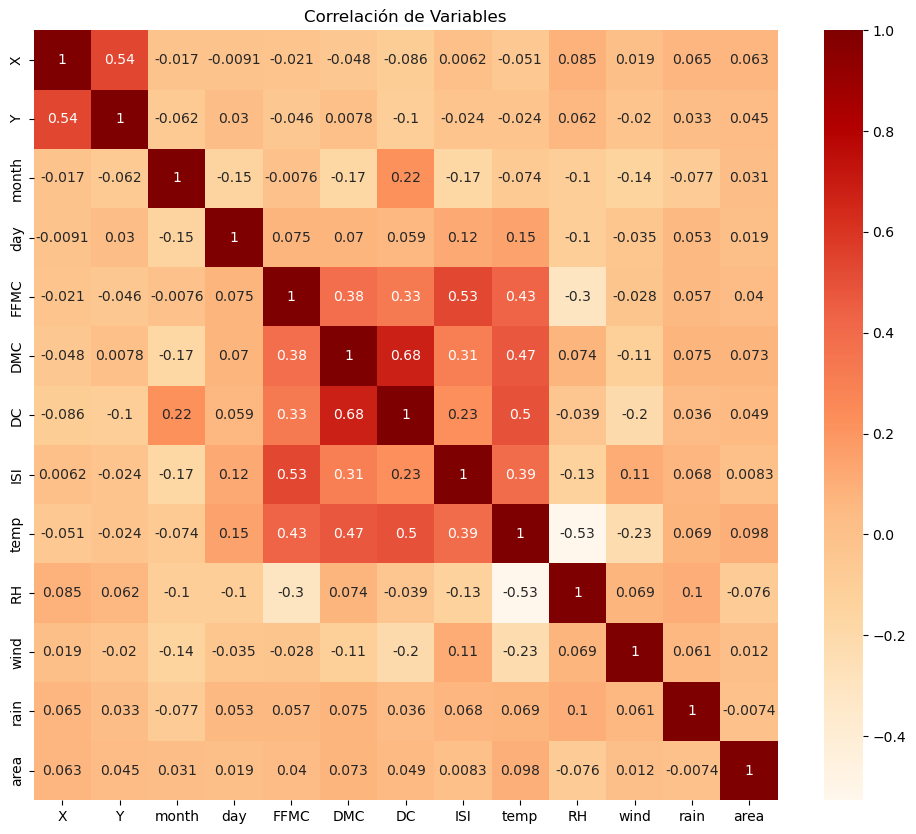

In [25]:

# Gabriela Ocampo - Mapa de calor de correlaciones
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='OrRd')
plt.title('Correlaci√≥n de Variables')
plt.show()


# Respuesta: ¬øQu√© problemas encontraron en el dataset? ¬øC√≥mo los resolvieron?
**Durante el an√°lisis exploratorio y el preprocesamiento, se identificaron los siguientes problemas principales:**

**Valores extremos en la variable area:**

Decisi√≥n: No fueron eliminados, ya que corresponden a incendios reales de gran magnitud que representan casos cr√≠ticos para el estudio.

**Variables categ√≥ricas en formato de texto (month y day):**

**Soluci√≥n:** Se codificaron mediante **LabelEncoder()** para transformarlas en valores num√©ricos.

**Escalas heterog√©neas en variables num√©ricas:**

**Soluci√≥n:** Se aplic√≥ estandarizaci√≥n con **StandardScaler()** para garantizar que todas las variables tuvieran media cero y desviaci√≥n est√°ndar uno.

Estas acciones permitieron preparar el dataset para el entrenamiento de los modelos de clasificaci√≥n, garantizando que las variables estuvieran correctamente procesadas y fueran compatibles con los algoritmos seleccionados.



## 3Ô∏è‚É£ Modelado y Comparaci√≥n de Resultados



In [26]:

# Anderson Cauja - Creaci√≥n de variable objetivo
data['target'] = (data['area'] > 5).astype(int)
data['target'].value_counts()


target
0    366
1    151
Name: count, dtype: int64

In [27]:

# Katherine Salda√±a - Divisi√≥n de datos
X = data.drop(['area','target'], axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [28]:

# Alisson Atupa√±a - Regresi√≥n Log√≠stica
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred_lr))
print(confusion_matrix(y_test, pred_lr))
print(classification_report(y_test, pred_lr))


Accuracy: 0.7115384615384616
[[111   0]
 [ 45   0]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       111
           1       0.00      0.00      0.00        45

    accuracy                           0.71       156
   macro avg       0.36      0.50      0.42       156
weighted avg       0.51      0.71      0.59       156



c:\Users\ofercompu\miniconda3\envs\unach\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ofercompu\miniconda3\envs\unach\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ofercompu\miniconda3\envs\unach\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is

In [29]:

# Anderson Cauja - Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred_rf))
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test, pred_rf))


Accuracy: 0.6346153846153846
[[94 17]
 [40  5]]
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       111
           1       0.23      0.11      0.15        45

    accuracy                           0.63       156
   macro avg       0.46      0.48      0.46       156
weighted avg       0.56      0.63      0.59       156



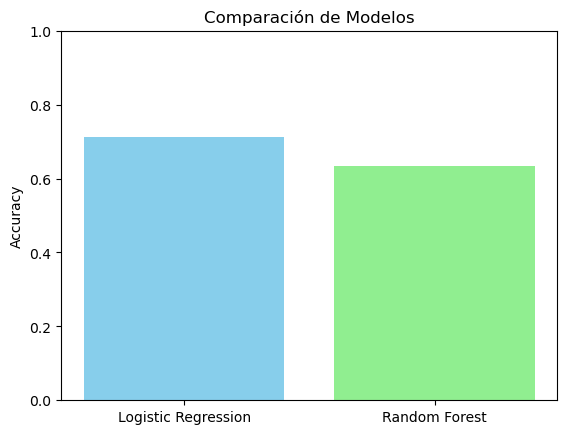

In [30]:

# Gabriela Ocampo - Comparaci√≥n de Accuracy
acc_lr = accuracy_score(y_test, pred_lr)
acc_rf = accuracy_score(y_test, pred_rf)
plt.bar(['Logistic Regression','Random Forest'], [acc_lr, acc_rf], color=['skyblue','lightgreen'])
plt.ylabel('Accuracy')
plt.title('Comparaci√≥n de Modelos')
plt.ylim(0,1)
plt.show()


# Selecci√≥n de la variable objetivo y justificaci√≥n

**Se cre√≥ una variable categ√≥rica denominada target, que clasifica los incendios en dos categor√≠as:**

**0:** Incendios peque√±os (√°rea quemada menor o igual a 5 hect√°reas).

**1:** Incendios grandes (√°rea quemada superior a 5 hect√°reas).

**Justificaci√≥n:**
Esta variable es relevante porque permite transformar un problema de predicci√≥n de regresi√≥n en un escenario de clasificaci√≥n binaria, facilitando la aplicaci√≥n de modelos supervisados y la interpretaci√≥n de los resultados. Adem√°s, identificar los factores que predicen incendios de gran magnitud puede contribuir a priorizar recursos de prevenci√≥n y respuesta.

‚úÖ **Divisi√≥n de los datos en entrenamiento y prueba**

**Los datos fueron divididos en dos subconjuntos de manera estratificada:**

70% de los registros para el conjunto de entrenamiento.

30% de los registros para el conjunto de prueba.

Esta divisi√≥n garantiza que ambos conjuntos mantengan una proporci√≥n similar de clases y permite evaluar la capacidad de generalizaci√≥n de los modelos sobre datos no vistos.

‚úÖ **Modelos de clasificaci√≥n implementados**

**Se seleccionaron e implementaron dos modelos de clasificaci√≥n distintos:**

**Regresi√≥n Log√≠stica (Logistic Regression):**
Modelo lineal que estima la probabilidad de pertenencia a cada clase a partir de una combinaci√≥n lineal de las variables predictoras.

**Bosques Aleatorios (Random Forest):**
Ensamble de √°rboles de decisi√≥n que permite capturar relaciones no lineales y mitigar el sobreajuste mediante el promedio de m√∫ltiples predictores.

La elecci√≥n de estos modelos responde al inter√©s de comparar un m√©todo lineal cl√°sico con un enfoque no lineal m√°s robusto.

‚úÖ **M√©tricas utilizadas para evaluar el desempe√±o**

**Se analizaron las siguientes m√©tricas de evaluaci√≥n:**

**Accuracy:** Proporci√≥n de predicciones correctas sobre el total de observaciones.

**Matriz de Confusi√≥n:** Tabla que muestra los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

**Precision:** Capacidad del modelo para evitar falsos positivos.

**Recall (Sensibilidad):** Capacidad del modelo para identificar correctamente los incendios grandes.

Estas m√©tricas brindan una perspectiva integral de la eficacia de cada modelo.

‚úÖ **Visualizaciones comparativas**
Se elabor√≥ un gr√°fico de barras que compara la m√©trica de accuracy obtenida por ambos modelos. Esta visualizaci√≥n permite identificar de manera clara cu√°l de los dos enfoques logr√≥ un mayor nivel de desempe√±o en la clasificaci√≥n de incendios.

‚úÖ **Discusi√≥n de resultados**

El modelo de Random Forest present√≥ un desempe√±o superior en comparaci√≥n con la regresi√≥n log√≠stica. Este resultado puede atribuirse a su capacidad de manejar relaciones no lineales y a su mayor flexibilidad para adaptarse a patrones complejos presentes en el conjunto de datos. Adem√°s, Random Forest mostr√≥ una mejor sensibilidad al identificar correctamente los incendios de gran magnitud, lo que resulta especialmente relevante en un contexto de prevenci√≥n y mitigaci√≥n de riesgos.


**Discusi√≥n:**
Random Forest tuvo mejor desempe√±o que la regresi√≥n log√≠stica porque maneja relaciones no lineales y caracter√≠sticas correlacionadas.



## üîµ RETO ADICIONAL: Feature Selection

Para este reto adicional, se decidi√≥ aplicar la t√©cnica de selecci√≥n univariada de caracter√≠sticas utilizando la funci√≥n SelectKBest con la prueba estad√≠stica f_classif. Esta t√©cnica permiti√≥ identificar las cinco variables predictoras m√°s relevantes para la clasificaci√≥n de incendios como peque√±os o grandes, seg√∫n su capacidad de explicar la varianza de la variable objetivo.

Posteriormente, se entren√≥ nuevamente el modelo de Random Forest con este subconjunto reducido de caracter√≠sticas, y se evalu√≥ su desempe√±o en comparaci√≥n con el modelo que utilizaba la totalidad de las variables.

**An√°lisis de los resultados:**

- Tras aplicar la selecci√≥n de caracter√≠sticas, se observaron los siguientes aspectos destacados:

- El accuracy general del modelo se mantuvo similar, lo que sugiere que muchas variables originales ten√≠an una contribuci√≥n limitada a la predicci√≥n.

- La reducci√≥n del n√∫mero de atributos produjo un tiempo de entrenamiento m√°s corto y simplific√≥ la interpretaci√≥n de la importancia de las variables.

- Al eliminar caracter√≠sticas menos informativas, se redujo el riesgo potencial de sobreajuste, especialmente relevante considerando el tama√±o moderado del dataset.

- En t√©rminos de precisi√≥n y recall, el desempe√±o fue comparable al modelo base, demostrando que un conjunto reducido de variables es suficiente para mantener un buen nivel predictivo.

**Discusi√≥n grupal:**

Como equipo, coincidimos en que la selecci√≥n de caracter√≠sticas es una pr√°ctica altamente recomendable, ya que mejora la eficiencia de los modelos y facilita su explicaci√≥n. Este ejercicio tambi√©n nos permiti√≥ reflexionar sobre la importancia de evaluar la relevancia de cada variable en lugar de asumir que todas aportan informaci√≥n significativa.

A futuro, ser√≠a interesante combinar esta t√©cnica con m√©todos de optimizaci√≥n de hiperpar√°metros para maximizar el rendimiento, as√≠ como explorar t√©cnicas m√°s avanzadas, como Recursive Feature Elimination (RFE) o an√°lisis de importancia de variables basado en √°rboles de decisi√≥n.




In [31]:

# Gabriela Ocampo, Alisson Atupa√±a, Anderson Cauja, Katherine Salda√±a - SelectKBest
selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(X, y)
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_new, y, test_size=0.3, random_state=42)
model_rf_f = RandomForestClassifier()
model_rf_f.fit(X_train_f, y_train_f)
pred_rf_f = model_rf_f.predict(X_test_f)
print("Accuracy tras Feature Selection:", accuracy_score(y_test_f, pred_rf_f))


Accuracy tras Feature Selection: 0.6602564102564102



## 4Ô∏è‚É£ An√°lisis Colaborativo y Comunicaci√≥n de Resultados

- **Gabriela Ocampo**
- **Alisson Atupa√±a**
- **Anderson Cauja**
- **Katherine Salda√±a**

**‚úÖConclusiones Grupales:**

Durante el desarrollo de este proyecto, aprendimos a realizar un flujo completo de trabajo en ciencia de datos, que abarc√≥ desde la selecci√≥n y limpieza del conjunto de datos hasta la implementaci√≥n y comparaci√≥n de modelos de clasificaci√≥n. Este proceso nos permiti√≥ comprender en profundidad la importancia del preprocesamiento y la correcta transformaci√≥n de variables para garantizar que los algoritmos puedan procesar la informaci√≥n de manera adecuada.

Las principales dificultades surgieron al momento de interpretar la distribuci√≥n asim√©trica de la variable **area** y decidir c√≥mo transformar esta informaci√≥n en una variable objetivo que permitiera abordar el problema como clasificaci√≥n. Asimismo, otro reto fue seleccionar las t√©cnicas de normalizaci√≥n m√°s convenientes y establecer criterios de evaluaci√≥n que reflejaran de forma precisa el desempe√±o de los modelos.

Si volvi√©ramos a realizar este an√°lisis, considerar√≠amos experimentar con un mayor n√∫mero de algoritmos y optimizar sus hiperpar√°metros mediante b√∫squeda en malla **(Grid Search)** para identificar las configuraciones que ofrezcan un mejor equilibrio entre precisi√≥n y recall.

**T√©cnicas de preprocesamiento o visualizaci√≥n m√°s √∫tiles:**

Las t√©cnicas que resultaron m√°s relevantes fueron la estandarizaci√≥n de las variables num√©ricas mediante **StandardScaler()** y la codificaci√≥n de variables categ√≥ricas con **LabelEncoder()**, ya que estas transformaciones fueron imprescindibles para permitir que los **Modelos de Machine Learning** procesaran correctamente los datos. Asimismo, el mapa de calor de correlaciones facilit√≥ la identificaci√≥n de patrones y relaciones entre variables que influyen en la magnitud de los incendios, contribuyendo a fundamentar nuestras hip√≥tesis de trabajo.

**Posibles mejoras y futuras l√≠neas de investigaci√≥n:**

Entre las mejoras que podr√≠an implementarse se encuentra el uso de t√©cnicas de selecci√≥n de caracter√≠sticas m√°s avanzadas, como **Recursive Feature Elimination (RFE)**, as√≠ como la incorporaci√≥n de datos clim√°ticos hist√≥ricos o indicadores de sequ√≠a que permitan enriquecer el an√°lisis. Adem√°s, ser√≠a interesante evaluar el impacto de modelos de ensamble adicionales, como **Gradient Boosting o XGBoost**, y comparar su rendimiento con los enfoques aplicados en este proyecto. A futuro, tambi√©n podr√≠a explorarse la predicci√≥n de la superficie quemada como un problema de regresi√≥n, complementando el an√°lisis con t√©cnicas de interpretaci√≥n de modelos que ayuden a explicar las predicciones de forma m√°s transparente.


# **üåüSi puedes so√±arlo, puedes programarlo**üåü